In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
! pip install seaborn==0.9.0

In [3]:
things to do


V1) split dataset to train and fit 
   https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

2) outliers?!!!
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

        
4) variable importtance to choose????
   https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

5) model

6)model evaluation

SyntaxError: invalid syntax (<ipython-input-3-d8a86dae11e4>, line 1)

In [3]:
# labrary imports
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2

%matplotlib inline

from datetime import date,timedelta
import time
from scipy import stats
today = date.today().strftime("%d/%m/%Y")

# show all columns
pd.set_option("display.max_columns", None)

# deactivate scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
params = {'z_score_threshold':3}

# read dataset

In [5]:
t0= time.time()
list_of_files = glob.glob('datasetFraud*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print("file that will be used for this run is: {}".format(latest_file))
print("reading file...")
data = pd.read_csv(latest_file)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
print("filling N/A...")
data.fillna(0,inplace=True)
display(data.head())
print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

file that will be used for this run is: datasetFraud_variables_20220118.csv
reading file...
filling N/A...


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,ext_org_ind,ext_den_ind,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0.000,0.000,C,M,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0.000,0.000,C,M,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1.000,0.000,C,C,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1.000,0.000,C,C,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0.000,0.000,C,M,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1


date: 27/01/2022   runtime: 0:00:23.209128


## create dummy variables

In [6]:
# dummy variables for type trx, exclude debit. when all are 0 then the trx is debit
for col in ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN']:
    data[col] = np.where(data['type']==col,1,0)

# dummy variable for ext_org_ind & ext_den_ind
data['ext_org_ind_C'] = np.where(data['ext_org_ind']=='C',1,0)
data['ext_den_ind_C'] = np.where(data['ext_den_ind']=='C',1,0)

# delete string variables
#del data['type']
del data['nameOrig']
del data['nameDest']
del data['ext_org_ind']
del data['ext_den_ind']

display(data.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0


# Outliers

In [7]:
# choose columns to include for outlier analysis
cols=['amount','Error_oldbalanceOrg','Error_org_fnlBlnce','Error_oldbalanceDest','Error_dest_fnlBlnce','origEntity_trxCnt','destEntity_trxCnt']

## Z-score

In [8]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0


In [9]:
t0= time.time()


# calculate z score
print("calculate z-score...")
z = np.abs(stats.zscore(data[cols]))

# rename cols in the z dataframe
cols_z=['{}_z'.format(c) for c in cols]
zdf=pd.DataFrame(z,columns=cols_z)

# if at least one of the selected characteristics has z-score>3 then the whole row is marked as an outlier
print("creating flag to identify outliers in the dataset...")
zdf=zdf>3
zdf['z_outlier'] = zdf.sum(axis=1)

# merge outlier result to the x_train dataset
data = data.merge( zdf[['z_outlier']], left_index=True, right_index=True)

print("check z-score outlier result")
display(data.head())
display(data.groupby('z_outlier')['amount'].count())
display(data.groupby(['z_outlier','isFraud'])['amount'].count())

# clean up
del z, cols_z,zdf

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))


calculate z-score...
creating flag to identify outliers in the dataset...
check z-score outlier result


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1,0
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0


z_outlier
0    4438072
1      78076
2     155338
3      18982
4       2673
5        430
Name: amount, dtype: int64

z_outlier  isFraud
0          0.000      4435087
           1.000         2985
1          0.000        77463
           1.000          613
2          0.000       155233
           1.000          105
3          0.000        18961
           1.000           21
4          0.000         2672
           1.000            1
5          0.000          430
Name: amount, dtype: int64

date: 27/01/2022   runtime: 0:00:22.247751


### example
dft = pd.DataFrame({'a':[1,2,4,2,3,4,17,5,4,8,9],'b':[44,6,1,89,56,6743,67,57,23,91,363], 'c':[567,345,4590099867,876,312,645,834,874,413,261,956]})
z = np.abs(stats.zscore(dft))
cols = ['a','b','c']
cols_z=['{}_z'.format(c) for c in cols]
zdf=pd.DataFrame(z,columns=cols_z)
#display(zdf)
zdf=zdf>3
zdf['z_outlier'] = zdf.sum(axis=1)

dft = dft.merge( zdf[['z_outlier']], left_index=True, right_index=True)
dft

In [10]:
##---> !!!!! what are these outliers? are all valid??? - how to decide???

## IQR score

In [11]:
t0= time.time()

# calculate Q1,Q3,IQR
print("calculate Q1,Q3,IQR...")
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# IQR_outlier flag
print("calculate iqr_outlier...")
iqr_outliers = (data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))
                                                   
iqr_outliers['iqr_outlier'] = iqr_outliers.sum(axis=1)

# merge outlier result to the x_train dataset
print("merge outlier result to data...")
data = data.merge( iqr_outliers[['iqr_outlier']], left_index=True, right_index=True)

print("check iqr outlier result")
display(data.head())
display(data.groupby('iqr_outlier')['amount'].count())
display(data.groupby(['iqr_outlier','isFraud'])['amount'].count())

# clean up
del Q1, Q3,IQR,iqr_outliers

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

calculate Q1,Q3,IQR...
calculate iqr_outlier...
merge outlier result to data...
check iqr outlier result


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1,0,0
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1,0,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0


iqr_outlier
0    3030712
1     424620
2     903983
3     185595
4     122257
5      25396
6       1007
7          1
Name: amount, dtype: int64

iqr_outlier  isFraud
0            0.000      3029286
             1.000         1426
1            0.000       424103
             1.000          517
2            0.000       902684
             1.000         1299
3            0.000       185232
             1.000          363
4            0.000       122152
             1.000          105
5            0.000        25381
             1.000           15
6            0.000         1007
7            0.000            1
Name: amount, dtype: int64

date: 27/01/2022   runtime: 0:00:56.712543


# split dataset to 70/30 training and testing data

In [12]:
t0= time.time()

# split the dataset to the variables and the target
print("spliting data to variables(x) and target(y)...")
x = data.loc[:, data.columns != 'isFraud']
y = data['isFraud']

# split x,y to train and test now so there is no data leceage later in the script
print("spliting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(x, y)

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

spliting data to variables(x) and target(y)...
spliting data to train and test...
date: 27/01/2022   runtime: 0:00:37.407281


In [25]:
display(x_train.loc[(x_train['z_outlier']==0)&(x_train['iqr_outlier']==0)].groupby(['z_outlier','iqr_outlier'])['amount'].count())
data.shape

z_outlier  iqr_outlier
0          0              2272223
Name: amount, dtype: int64

(4693571, 31)

## variable selection

### Information Gain

### Chi-square Test

## Variance Threshold

In [18]:
t0= time.time()

from sklearn.feature_selection import VarianceThreshold

print("initial features : {}".format(x_train.shape))     #output (143, 59)

print("run the Variable Threshold...")
var_filter = VarianceThreshold(threshold = 0.0)  

print("fit variable Threshold...")
train = var_filter.fit_transform(x_train)

#to get the count of features that are not constant
print("final features : {}".format(train.shape))    # output (143, 56)       
#or
print(len(x_train.columns[var_filter.get_support()]))

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

initial features : (3520178, 29)
run the Variable Threshold...
fit variable Threshold...
final features : (3520178, 28)
28
date: 24/01/2022   runtime: 0:00:07.247945


## linear regression coefficients for feature importance

define the model...
fit the model...
get importance...
Feature: 0 , Score: -1.8606852574571503e-06    - 'step'
Feature: 1 , Score: 6.801223484848062e-08    - 'amount'
Feature: 2 , Score: -16.48530377251493    - 'oldbalanceOrg'
Feature: 3 , Score: 60.952416392856485    - 'newbalanceOrig'
Feature: 4 , Score: 17.71894868390149    - 'oldbalanceDest'
Feature: 5 , Score: -46.36834826255488    - 'newbalanceDest'
Feature: 6 , Score: 0.8257465466909221    - 'isFlaggedFraud'
Feature: 7 , Score: 16.485303898158154    - 'Error_oldbalanceOrg'
Feature: 8 , Score: -16.487879808391103    - 'Error_newbalanceOrig'
Feature: 9 , Score: -44.46453670992884    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 44.46453671194079    - 'diff_org_fnl_balance'
Feature: 11 , Score: -17.71894861569719    - 'Error_oldbalanceDest'
Feature: 12 , Score: 17.69436946995383    - 'Error_newbalanceDest'
Feature: 13 , Score: 28.67397872441883    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: -28.673978792852512    - 'diff_dest_fnl_ba

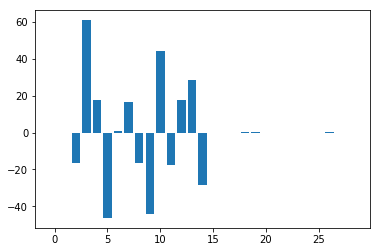

In [18]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
print("define the model...")
model = LinearRegression()

# fit the model
print("fit the model...")
model.fit(x_train, y_train)

# get importance
print("get importance...")
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print("Feature: {} , Score: {}    - '{}'".format(i,v, x_train.columns[i]))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
step,1.000,0.044,-0.005,-0.005,0.027,0.030,-0.005,0.001,-0.005,-0.005,-0.008,-0.027,0.027,0.030,0.034,0.017,-0.000,0.000,0.000,-0.348,-0.000,-0.348,-0.000,0.002,-0.001,0.001,nan,0.000,-0.010,-0.032
amount,0.044,1.000,-0.007,-0.009,0.364,0.550,0.051,0.003,-0.007,-0.009,-0.062,-0.486,0.364,0.550,0.527,-0.269,0.000,0.000,0.000,0.144,0.005,0.144,-0.183,0.340,-0.004,-0.009,nan,0.183,0.267,0.245
oldbalanceOrg,-0.005,-0.007,1.000,0.999,0.071,0.042,0.006,0.000,1.000,0.999,0.993,0.046,0.071,0.042,0.043,0.001,0.000,-0.000,-0.000,0.142,0.004,0.142,-0.188,-0.082,-0.202,0.507,nan,0.188,0.600,0.426
newbalanceOrig,-0.005,-0.009,0.999,1.000,0.072,0.041,-0.007,0.000,0.999,1.000,0.994,0.050,0.072,0.041,0.043,0.001,0.000,-0.000,-0.000,0.144,0.004,0.144,-0.192,-0.087,-0.212,0.527,nan,0.192,0.597,0.430
oldbalanceDest,0.027,0.364,0.071,0.072,1.000,0.966,-0.006,-0.000,0.071,0.072,0.065,-0.056,1.000,0.966,0.982,-0.081,0.000,-0.000,-0.000,0.415,0.005,0.415,-0.250,0.144,0.093,0.080,nan,0.250,0.473,0.482
newbalanceDest,0.030,0.550,0.042,0.041,0.966,1.000,-0.000,-0.000,0.042,0.041,0.021,-0.185,0.966,1.000,0.991,-0.262,0.000,-0.000,-0.000,0.397,0.005,0.397,-0.250,0.208,0.098,0.032,nan,0.250,0.479,0.464
isFraud,-0.005,0.051,0.006,-0.007,-0.006,-0.000,1.000,0.028,0.006,-0.007,-0.007,0.005,-0.006,-0.000,-0.000,0.001,-0.000,-0.000,-0.000,-0.001,0.000,-0.001,-0.020,0.042,0.009,-0.015,nan,0.020,0.009,0.013
isFlaggedFraud,0.001,0.003,0.000,0.000,-0.000,-0.000,0.028,1.000,0.000,0.000,-0.000,-0.005,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.001,-0.000,-0.001,-0.001,0.003,-0.001,-0.000,nan,0.001,0.000,0.001
Error_oldbalanceOrg,-0.005,-0.007,1.000,0.999,0.071,0.042,0.006,0.000,1.000,0.999,0.993,0.046,0.071,0.042,0.043,0.001,0.000,-0.000,-0.000,0.142,0.004,0.142,-0.188,-0.082,-0.202,0.507,nan,0.188,0.600,0.426
Error_newbalanceOrig,-0.005,-0.009,0.999,1.000,0.072,0.041,-0.007,0.000,0.999,1.000,0.994,0.050,0.072,0.041,0.043,0.001,0.000,-0.000,-0.000,0.144,0.004,0.144,-0.192,-0.087,-0.212,0.527,nan,0.192,0.597,0.430


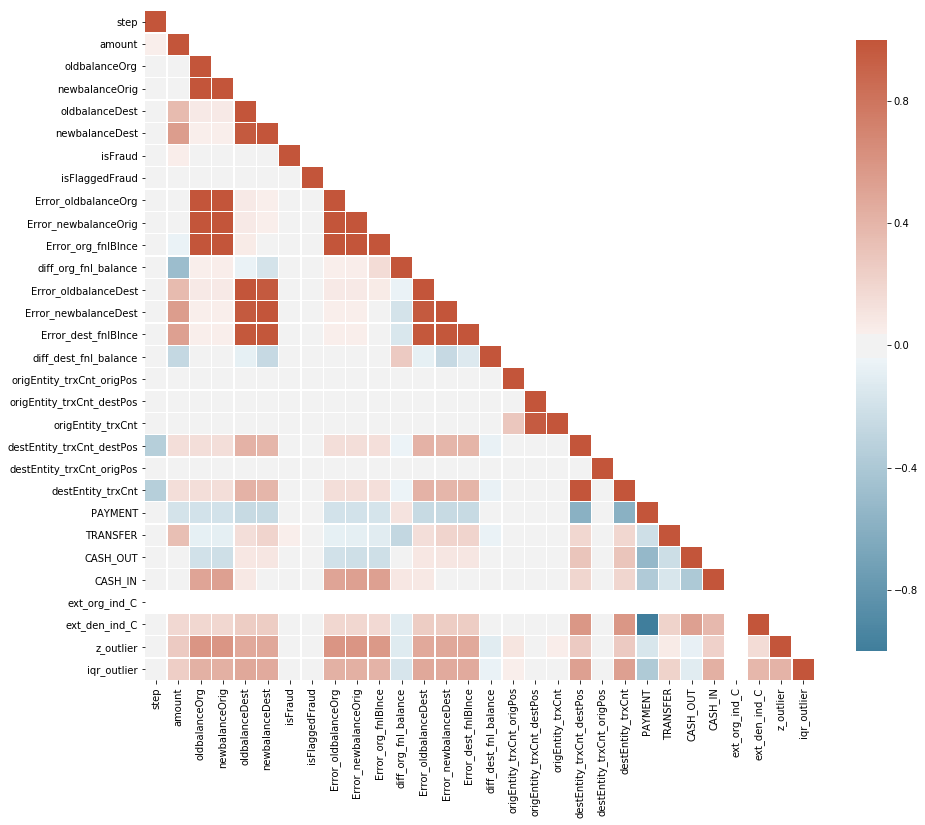

In [23]:
# Define a nice color map for our heatmap
fig, ax = plt.subplots(figsize=(15,15))  

mask = np.triu(np.ones_like(data.corr(), dtype=bool))
np.fill_diagonal(mask, False)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=data.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    , annot=True
    , mask=mask
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  
# show the heatmap
plt.show()

## CART Regression Feature Importance

define the model...
fit the model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0.0026529350008727367    - 'diff_dest_fnl

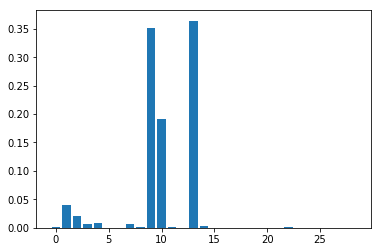

In [25]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot


# define the model
print("define the model...")
model = DecisionTreeRegressor()

# fit the model

print("fit the model...")
model.fit(x_train, y_train)

# get importance
print("get importance...")
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print("Feature: {} , Score: {}    - '{}'".format(i,v, x_train.columns[i]))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
from matplotlib import pyplot

def run_feat_Selection_alg(title,model, x=x_train,y=y_train, importance = model.feature_importances_):
    t0= time.time()
    
    print(title)
                           
    print("define the model...")
    model = model
                           
    print("fit model...")
    model.fit(x, y)
    
    print("get importance...")
    importance = importance
    
    # summarize feature importance
    for i,v in enumerate(importance):
        print("Feature: {} , Score: {}    - '{}'".format(i,v, x.columns[i]))

    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    
    print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

## CART Classification Feature Importance

CART Classification Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0.0026

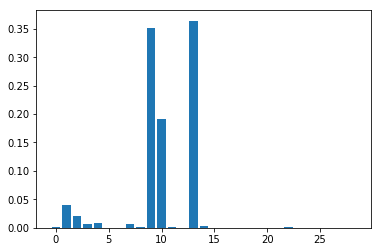

date: 24/01/2022   runtime: 0:02:03.093970


In [28]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = DecisionTreeClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


run_feat_Selection_alg(title = 'CART Classification Feature Importance'
                       ,model = DecisionTreeClassifier(), importance = model.feature_importances_)

## Random Forest Regression Feature Importance

Random Forest Regression Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0

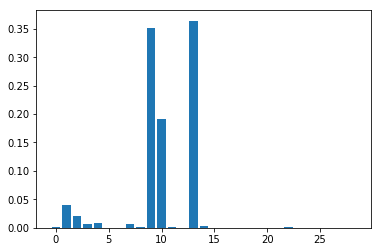

date: 24/01/2022   runtime: 0:09:02.778170


In [29]:
from sklearn.ensemble import RandomForestRegressor

run_feat_Selection_alg(title = 'Random Forest Regression Feature Importance'
                       ,model = RandomForestRegressor(), importance = model.feature_importances_)

## Random Forest Classification Feature Importance

Random Forest CLASSIFICATION Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Scor

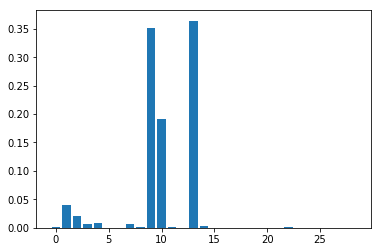

date: 24/01/2022   runtime: 0:02:04.624354


In [30]:
from sklearn.ensemble import RandomForestClassifier

run_feat_Selection_alg(title = 'Random Forest CLASSIFICATION Feature Importance'
                       ,model = RandomForestClassifier(), importance = model.feature_importances_)

## XGBoost Feature Importance

In [38]:
!pip install cmake
!pip install xgboost


# check xgboost version
import xgboost
print(xgboost.__version__)

    100% |████████████████████████████████| 21.3MB 1.9MB/s eta 0:00:01   35% |███████████▏                    | 7.5MB 27.7MB/s eta 0:00:01    59% |███████████████████             | 12.7MB 26.6MB/s eta 0:00:01    71% |██████████████████████▉         | 15.2MB 24.7MB/s eta 0:00:01    83% |██████████████████████████▊     | 17.8MB 26.6MB/s eta 0:00:01    96% |██████████████████████████████▉ | 20.5MB 26.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c4/04/32989ec64004dca894f1d3ea4c41b1397272857edf14c1a9d1492b692d2d/xgboost-1.5.2.tar.gz
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /root/.cache/pip/wheels/a7/60/20/78ce4cd566925a273c5ac65e5562ae91fc7555d82b1814b83b
Successfully built xgboost
1.5.2


In [36]:
import pip
pip.main(['install', 'xgboost'])

AttributeError: module 'pip' has no attribute 'main'

In [39]:
import xgboost
print(xgboost.__version__)

1.5.2


In [ ]:
### XGBoost Regression Feature Importance

In [ ]:
from xgboost import XGBRegressor

run_feat_Selection_alg(title = 'XGBoost Regression Feature Importance'
                       ,model = XGBRegressor(), importance = model.feature_importances_)

In [ ]:
### XGBoost Classification Feature Importance

XGBoost Classification Feature Importance
define the model...
fit model...


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:34] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl

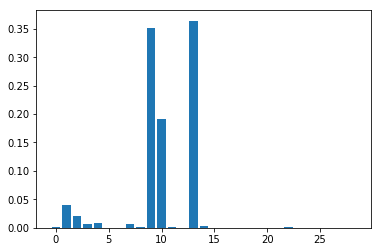

date: 24/01/2022   runtime: 0:23:55.032980


In [40]:
from xgboost import XGBClassifier

run_feat_Selection_alg(title = 'XGBoost Classification Feature Importance'
                       ,model = XGBClassifier(), importance = model.feature_importances_)

In [47]:
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [44]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities[:, 1])))

AUPRC = 0.9981051483173861


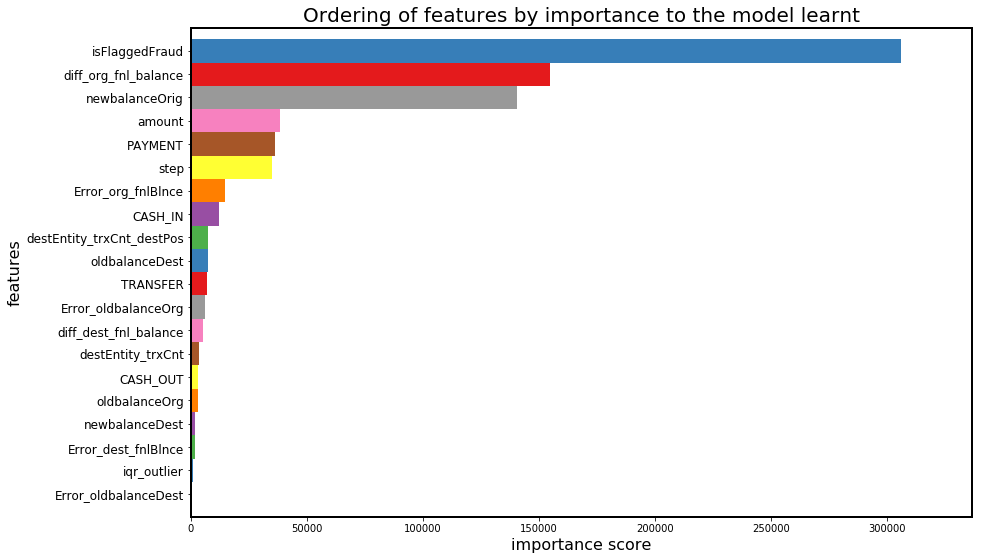

In [45]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [49]:
!pip install graphviz

    100% |████████████████████████████████| 51kB 4.4MB/s ta 0:00:011


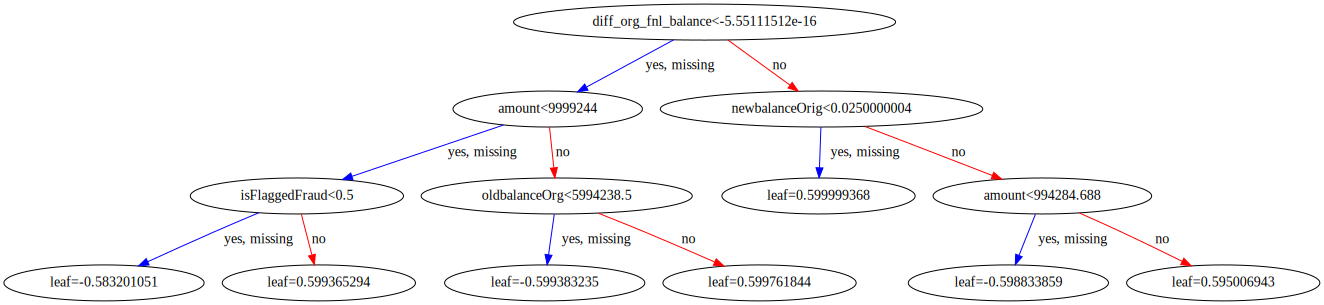

In [50]:
to_graphviz(clf)

In [ ]:
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), x_train,\
                                         y_train, scoring = 'average_precision')

/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:12] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:51] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:20] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:20] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:34] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:14] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:41] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:26] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:35] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20)

# PCA = Principal Component Analysis 

In [44]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [49]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x_train = StandardScaler().fit_transform(x_train[[x for x in x_train.columns  if x not in ['type','isFlaggedFraud']]])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [40]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,isFraud
0,-0.512,-0.644,0.000
1,1.844,2.046,0.000
2,-2.140,-0.280,1.000
3,-0.403,0.574,1.000
4,-2.137,-0.284,nan


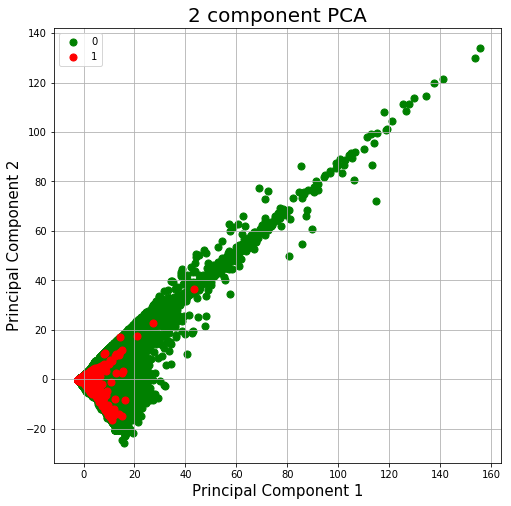

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['isFraud'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0,0.5,'cumulative explained variance')

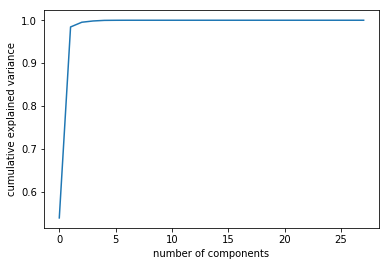

In [47]:
# how many components needed

# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

pca = PCA().fit(data[[x for x in x_train.columns  if x not in ['type','isFlaggedFraud']]])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [50]:
# 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [51]:
finalDf = pd.concat([principalDf, y_train], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,isFraud
0,-0.357,0.701,-1.544,0.000
1,0.142,1.039,-1.933,0.000
2,-0.904,-0.632,-0.130,1.000
3,0.512,-0.422,-1.460,1.000
4,4.744,-2.890,-1.384,0.000


In [ ]:
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

In [55]:
# Plot initialisation

my_color=y_train.codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['principal component 1']), max(finalDf['principal component 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['principal component 2']), max(finalDf['principal component 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['principal component 3']), max(finalDf['principal component 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

AttributeError: 'Series' object has no attribute 'codes'

In [46]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1,0,0
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1,0,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0


In [ ]:
#https://lukesingham.com/whos-going-to-leave-next/

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from IPython.display import Image  
from pydotplus import graph_from_dot_data

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
x_train = x_train[[x for x in x_train.columns  if x not in ['type','isFlaggedFraud']]]

In [15]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print( "Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))
#[(0.3523, 'satisfaction_level'), (0.1738, 'time_spend_company'), (0.1705, 'number_project'), (0.158, 'average_montly_hours'), (0.1043, 'last_evaluation'), (0.0077, '$_high'), (0.0065, 'Work_accident'), (0.0059, '$_medium'), (0.0042, 'sales_technical'), (0.0034, 'sales_sales'), (0.0028, 'sales_support'), (0.0024, 'sales_hr'), (0.0023, 'sales_accounting'), (0.0019, 'sales_management'), (0.0014, 'sales_RandD'), (0.001, 'sales_product_mng'), (0.001, 'sales_marketing'), (0.0006, 'promotion_last_5years')]

Features sorted by their score:
[(0.31519999999999998, 'Error_org_fnlBlnce'), (0.19109999999999999, 'newbalanceOrig'), (0.10290000000000001, 'diff_org_fnl_balance'), (0.068900000000000003, 'Error_dest_fnlBlnce'), (0.060900000000000003, 'Error_newbalanceDest'), (0.051499999999999997, 'oldbalanceOrg'), (0.051499999999999997, 'Error_oldbalanceOrg'), (0.038699999999999998, 'amount'), (0.036600000000000001, 'Error_oldbalanceDest'), (0.028199999999999999, 'newbalanceDest'), (0.021899999999999999, 'TRANSFER'), (0.0086, 'Error_newbalanceOrig'), (0.0054000000000000003, 'destEntity_trxCnt'), (0.0053, 'step'), (0.0038, 'oldbalanceDest'), (0.0032000000000000002, 'destEntity_trxCnt_destPos'), (0.0016999999999999999, 'CASH_IN'), (0.0016000000000000001, 'diff_dest_fnl_balance'), (0.0014, 'CASH_OUT'), (0.00069999999999999999, 'z_outlier'), (0.00069999999999999999, 'iqr_outlier'), (0.0, 'origEntity_trxCnt_origPos'), (0.0, 'origEntity_trxCnt_destPos'), (0.0, 'origEntity_trxCnt'), (0.0, 'ext_org_ind_C'),

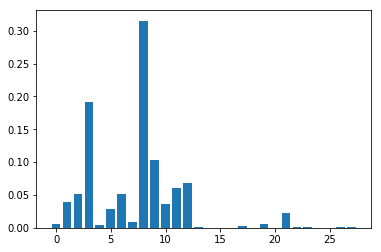

In [16]:
plt.bar([x for x in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.show()

In [17]:
# Create variable lists and drop
all_vars = x_train.columns.tolist()
top_5_vars = ['Error_org_fnlBlnce','Error_dest_fnlBlnce', 'newbalanceOrig','Error_oldbalanceDest','diff_org_fnl_balance','Error_newbalanceOrig','Error_oldbalanceOrg','TRANSFER', 'amount', 'Error_newbalanceDest', 'oldbalanceOrg', 'newbalanceDest','diff_dest_fnl_balance','CASH_OUT', 'oldbalanceDest']
bottom_vars = [cols for cols in all_vars if cols not in top_5_vars]

# Drop less important variables leaving the top_5
x_train    = x_train.drop(bottom_vars, axis=1)
x_test     = x_test.drop(bottom_vars, axis=1)
#x_validate = x_validate.drop(bottom_vars, axis=1)

# modelling

In [14]:
x_train = x_train[[x for x in x_train.columns  if x not in ['type','isFlaggedFraud']]]

In [15]:
x_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
1612714,156,217849.930,2220917.310,2438767.240,357405.520,139555.590,2220917.310,2438767.240,2438767.240,0.000,357405.520,139555.590,139555.590,0.000,1,0.000,1,14,0.000,14,0,0,0,1,1,1,0,2
14854,8,7756.390,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
3840740,282,2427.140,20719.000,18291.860,0.000,0.000,20719.000,18291.860,18291.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
3442944,257,89217.650,0.000,0.000,504716.810,593934.460,-1.000,-1.000,-1.000,-1.000,504716.810,593934.460,593934.460,0.000,1,0.000,1,39,0.000,39,0,0,1,0,1,1,0,0
2864958,227,403599.230,21244.000,0.000,0.000,403599.230,21244.000,0.000,-382355.230,-382355.230,0.000,403599.230,403599.230,0.000,1,0.000,1,3,0.000,3,0,0,1,0,1,1,0,1


In [16]:
x_test = x_test[[x for x in x_train.columns  if x not in ['type','isFlaggedFraud']]]
x_test.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
2853502,227,76047.830,6105200.600,6181248.430,1641989.510,1565941.680,6105200.600,6181248.430,6181248.430,0.000,1641989.510,1565941.680,1565941.680,0.000,1,0.000,1,18,0.000,18,0,0,0,1,1,1,0,2
2092299,182,10793.630,546130.940,535337.300,0.000,0.000,546130.940,535337.300,535337.310,0.010,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,2
3708827,277,1087.020,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
1086395,129,5126.400,849234.000,844107.600,0.000,0.000,849234.000,844107.600,844107.600,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,2
669273,36,193863.110,0.000,0.000,312584.110,506447.220,-1.000,-1.000,-1.000,-1.000,312584.110,506447.220,506447.220,0.000,1,0.000,1,18,0.000,18,0,0,1,0,1,1,0,0


In [ ]:
models = pd.DataFrame(columns = ['model','accuracy','precision','recall','f1', 'cv_precision'])
models

def model_running(title, model):
    t0= time.time()
    # Instantiate
    print("instansiate model {} ...".format(title))
    model_inst = model   
    
    # Fit
    print("model fitting...")
    model_fit = model_inst.fit(x_train, y_train)
    
    # accuracy
    print("model accuracy for trained data...")
    print(model_fit.score(x_train, y_train))

    # Predictions/probs on the test dataset
    print("predictions and probs or test dataset...")
    predicted = pd.DataFrame(model_fit.predict(x_test))
    probs = pd.DataFrame(model_fit.predict_proba(x_test))

    # Store metrics
    print("calculate metrics...")
    accuracy = metrics.accuracy_score(y_test, predicted)
    roc_auc = metrics.roc_auc_score(y_test, probs[1])
    confus_matrix = metrics.confusion_matrix(y_test, predicted)
    classification_report = metrics.classification_report(y_test, predicted)
    precision = metrics.precision_score(y_test, predicted, pos_label=1)
    recall = metrics.recall_score(y_test, predicted, pos_label=1)
    f1 = metrics.f1_score(y_test, predicted, pos_label=1)

    # Evaluate the model using 10-fold cross-validation
    print("calculate cross-validation...")
    rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
    rf_cv_mean = np.mean(rf_cv_scores)
    
    print("Store metrics...")
    models = models.append({'model':title
                           ,'accuracy':accuracy
                           ,'precision':precision
                           ,'recall':recall
                           ,'f1':f1
                           ,'cv_precision':rf_cv_mean },ignore_index=True)
    
    print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

## 1. Logistic Regression #

In [18]:
# Instantiate
logit_model = LogisticRegression()
# Fit
logit_model = logit_model.fit(x_train, y_train)
# How accurate?
logit_model.score(x_train, y_train)
#0.7874

# How does it perform on the test dataset?

# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
print(metrics.accuracy_score(y_test, predicted))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.999637802509


In [19]:
print( metrics.confusion_matrix(y_test, predicted))

print( metrics.classification_report(y_test, predicted))

[[1172293     188]
 [    237     675]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00   1172481
        1.0       0.78      0.74      0.76       912

avg / total       1.00      1.00      1.00   1173393



In [20]:
# Store metrics
logit_accuracy = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

In [22]:
# Evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(LogisticRegression(), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

## 2. Decision Tree

In [16]:
# Instantiate with a max depth of 3
tree_model = tree.DecisionTreeClassifier(max_depth=3)
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)

# output decision plot
dot_data = tree.export_graphviz(tree_model, out_file=None,
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
tree_cv_scores

array([ 1.        ,  0.97959184,  0.9516129 ,  1.        ,  1.        ,
        0.98039216,  0.98148148,  0.95      ,  0.96551724,  0.94230769])

## 3. Random Forest

In [17]:
# Instantiate
rf = RandomForestClassifier()    
# Fit
rf_model = rf.fit(x_train, y_train)
# training accuracy 99.74%
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)
rf_cv_scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [24]:
# Model comparison
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision],
  'recall' : [logit_recall, tree_recall, rf_recall],
  'F1' : [logit_f1, tree_f1, rf_f1],
#  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision,recall,F1
2,r.f.,1.000,1.000,0.990,0.995
1,d.Tree,1.000,0.966,0.615,0.752
0,Logistic,1.000,0.782,0.740,0.761


## 4. SUPPORT VECTOR MACHINE

In [ ]:
# Instantiate
svm_model = SVC(probability=True)
# Fit
svm_model = svm_model.fit(x_train, y_train)
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# # Evaluate the model using 10-fold cross-validation
# svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
# svm_cv_mean = np.mean(svm_cv_scores)
# svm_cv_scores

## 5. KNN

In [ ]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)
knn_roc_auc = metrics.roc_auc_score(y_test, probs[1])
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted)
knn_classification_report = metrics.classification_report(y_test, predicted)
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)
knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# # Evaluate the model using 10-fold cross-validation
# knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
# knn_cv_mean = np.mean(knn_cv_scores)
# knn_cv_scores

## 6. TWO CLASS BAYES

In [16]:
# Instantiate
bayes_model = GaussianNB()
# Fit the model
bayes_model.fit(x_train, y_train)
# Accuracy
bayes_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))
probs = pd.DataFrame(bayes_model.predict_proba(x_test))

# Store metrics
bayes_accuracy = metrics.accuracy_score(y_test, predicted)
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted)
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# # Evaluate the model using 10-fold cross-validation
# bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
# bayes_cv_mean = np.mean(bayes_cv_scores)

## Results

In [ ]:
 Model comparison
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.', 'SVM', 'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1, bayes_f1],
#  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean, bayes_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)